# Data Exploration and Pre-processing

In [1]:
# Import the libraries needed
import os

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
# Get the path of the dataset directory
dir_path = os.getcwd()
df_path = dir_path + "\\data\\Project 2 Dataset.xls"

In [3]:
# Import the dataset
df = pd.read_excel(df_path, skiprows=1)

In [4]:
# Get an overview of the dataset structure
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Check features distribution
df.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# Check the presence of null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No null values are present, nice.

In [7]:
# Check the dimension of the dataset
print("Shape of the initial dataset: ", df.shape)

Shape of the initial dataset:  (30000, 25)


In [8]:
# Check how many duplicates are there
df_copy = df
df_copy.drop_duplicates(inplace = True)
n_nulls = df.shape[0] - df_copy.shape[0]
print("Number of duplicates: ", n_nulls)

Number of duplicates:  0


We also don't have duplicates in the dataset, great.

In [9]:
# The feature PAY_0 should be PAY_1, as all the other features per month start from 1.
# As we need to rename it, we decide to change all the numbering of the features using the corresponding month number instead of an ordering index.
# PAY_0, corresponding to September, will become PAY_9, and the same for the others.
df = df.rename(columns = {"PAY_0": "PAY_9",
                          "PAY_2": "PAY_8",
                          "PAY_3": "PAY_7",
                          "PAY_4": "PAY_6",
                          "PAY_5": "PAY_5",
                          "PAY_6": "PAY_4",
                          "BILL_AMT1": "BILL_AMT_9",
                          "BILL_AMT2": "BILL_AMT_8",
                          "BILL_AMT3": "BILL_AMT_7",
                          "BILL_AMT4": "BILL_AMT_6",
                          "BILL_AMT5": "BILL_AMT_5",
                          "BILL_AMT6": "BILL_AMT_4",
                          "PAY_AMT1": "PAY_AMT_9",
                          "PAY_AMT2": "PAY_AMT_8",
                          "PAY_AMT3": "PAY_AMT_7",
                          "PAY_AMT4": "PAY_AMT_6",
                          "PAY_AMT5": "PAY_AMT_5",
                          "PAY_AMT6": "PAY_AMT_4"})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_9,PAY_8,PAY_7,PAY_6,...,BILL_AMT_6,BILL_AMT_5,BILL_AMT_4,PAY_AMT_9,PAY_AMT_8,PAY_AMT_7,PAY_AMT_6,PAY_AMT_5,PAY_AMT_4,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Rename features and make SEX, EDUCATION, MARRIAGE dummies

We decide to keep 0 (missing value), 4, 5, 6 (others) values in EDUCATION feature
and 0 (missing values), 3 (others) in MARRIAGE feature as we interpret them as actual values, and not missing information.
They are information, and we think it doesn't change performances in the models either keeping them or not.

In [10]:
# Rename feature SEX to SEX_MALE and assign to it 0s and 1s
df = df.rename(columns = {"SEX": "SEX_MALE"})
                          
df['SEX_MALE'] = df['SEX_MALE'].replace(2, 0)
df['SEX_MALE'].value_counts()

0    18112
1    11888
Name: SEX_MALE, dtype: int64

In [11]:
# Convert EDUATION and MARRIAGE to binary features
df = pd.get_dummies(df, columns=['EDUCATION', 'MARRIAGE'])
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX_MALE', 'AGE', 'PAY_9', 'PAY_8', 'PAY_7',
       'PAY_6', 'PAY_5', 'PAY_4', 'BILL_AMT_9', 'BILL_AMT_8', 'BILL_AMT_7',
       'BILL_AMT_6', 'BILL_AMT_5', 'BILL_AMT_4', 'PAY_AMT_9', 'PAY_AMT_8',
       'PAY_AMT_7', 'PAY_AMT_6', 'PAY_AMT_5', 'PAY_AMT_4',
       'default payment next month', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [12]:
# Divide PAY_N features between ordinal and binary
#################

In [13]:
# Split the data into features and target
X = df.drop('default payment next month', axis = 1)
y = df['default payment next month']

C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


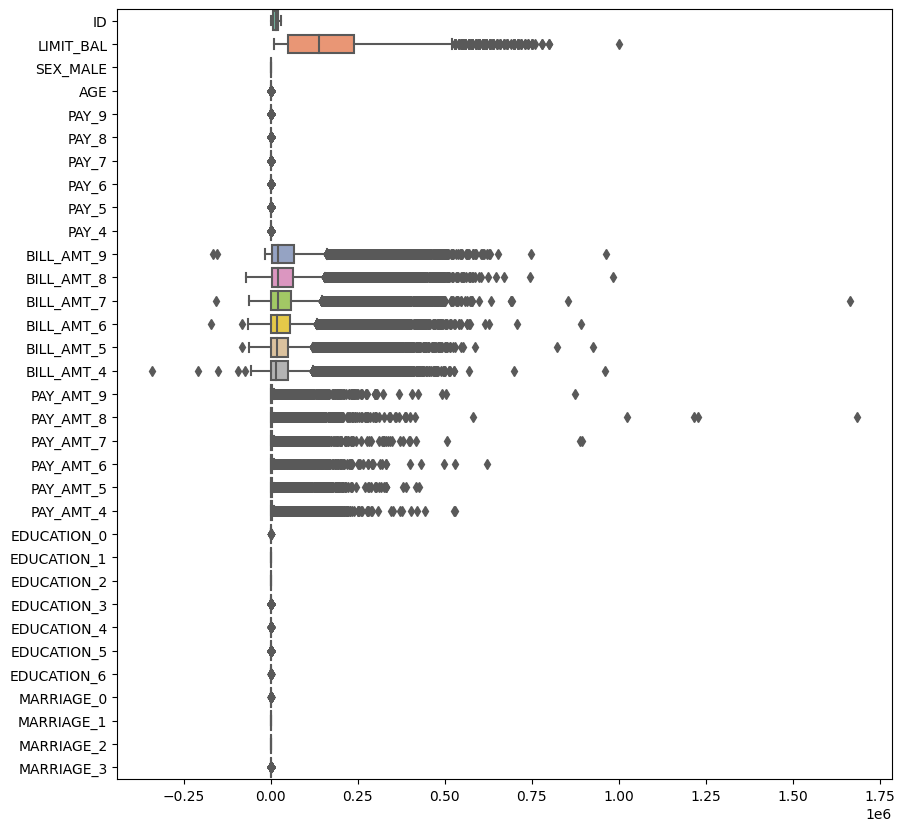

In [14]:
# Get a first exploration of the variables distribution visually
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=X, orient="h", palette="Set2")

From this visualization we can't really see the distribution of the features, as they are on different scales.
It is better to plot them singularly or in griopus with similar scales.

C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


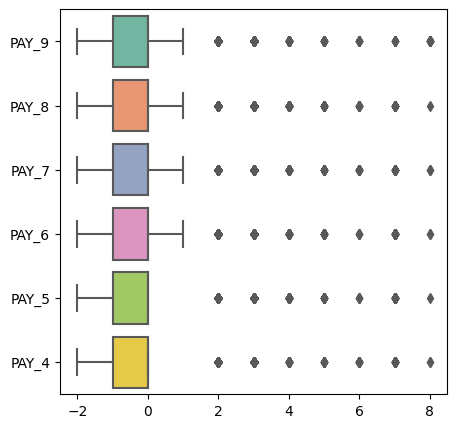

In [15]:
# Get a first exploration of the PAY_N variables distribution visually
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=X[['PAY_9', 'PAY_8', 'PAY_7','PAY_6', 'PAY_5', 'PAY_4']], orient="h", palette="Set2")

C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


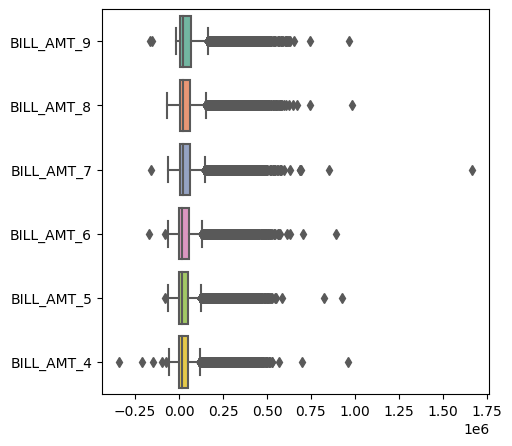

In [16]:
# Get a first exploration of the BILL_AMT_N variables distribution visually
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=X[['BILL_AMT_9', 'BILL_AMT_8', 'BILL_AMT_7','BILL_AMT_6', 'BILL_AMT_5', 'BILL_AMT_4']], orient="h", palette="Set2")

C:\Users\manue\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


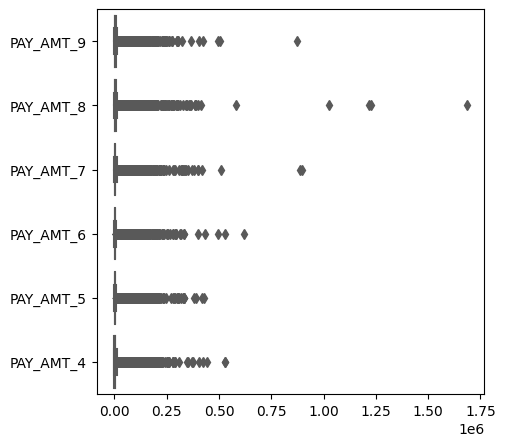

In [17]:
# Get a first exploration of the PAY_AMT_N variables distribution visually
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=X[['PAY_AMT_9', 'PAY_AMT_8', 'PAY_AMT_7','PAY_AMT_6', 'PAY_AMT_5', 'PAY_AMT_4']], orient="h", palette="Set2")

All the features of the same "category" have very similar distributions.
For example, all the BILL_AMT_N features have almost the same distribution.

In [18]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX_MALE', 'AGE', 'PAY_9', 'PAY_8', 'PAY_7',
       'PAY_6', 'PAY_5', 'PAY_4', 'BILL_AMT_9', 'BILL_AMT_8', 'BILL_AMT_7',
       'BILL_AMT_6', 'BILL_AMT_5', 'BILL_AMT_4', 'PAY_AMT_9', 'PAY_AMT_8',
       'PAY_AMT_7', 'PAY_AMT_6', 'PAY_AMT_5', 'PAY_AMT_4', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [19]:
# Select the numerical features, except the ID and the ones which are categoricals but encoded
columns = list(X.columns)

numerical_columns = [columns[1]] + [columns[3]] + columns[10:22]   # Select all the numerical columns names
X_numerics = X[numerical_columns]  # Select the data about all the numerical columns
payment_columns =  [columns[1]] + columns[10:22]  # Select the columns names about monthly amounts

print("Numerical features:\n", numerical_columns)
print()
print("Monthly amounts-related numerical features:\n", payment_columns)

Numerical features:
 ['LIMIT_BAL', 'AGE', 'BILL_AMT_9', 'BILL_AMT_8', 'BILL_AMT_7', 'BILL_AMT_6', 'BILL_AMT_5', 'BILL_AMT_4', 'PAY_AMT_9', 'PAY_AMT_8', 'PAY_AMT_7', 'PAY_AMT_6', 'PAY_AMT_5', 'PAY_AMT_4']

Monthly amounts-related numerical features:
 ['LIMIT_BAL', 'BILL_AMT_9', 'BILL_AMT_8', 'BILL_AMT_7', 'BILL_AMT_6', 'BILL_AMT_5', 'BILL_AMT_4', 'PAY_AMT_9', 'PAY_AMT_8', 'PAY_AMT_7', 'PAY_AMT_6', 'PAY_AMT_5', 'PAY_AMT_4']


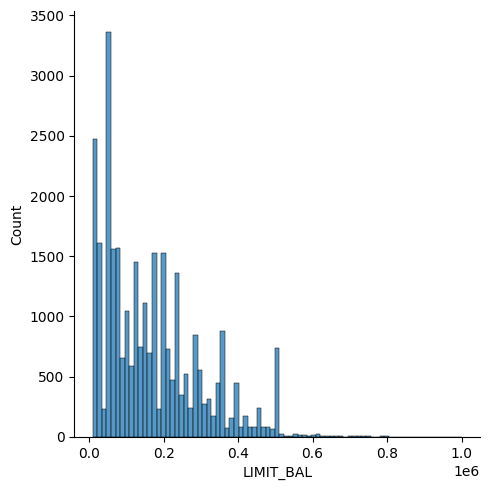

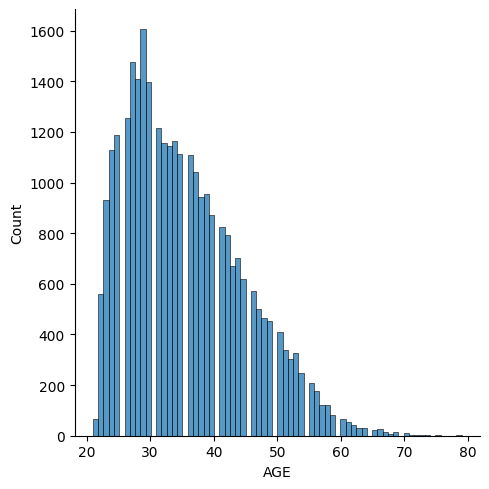

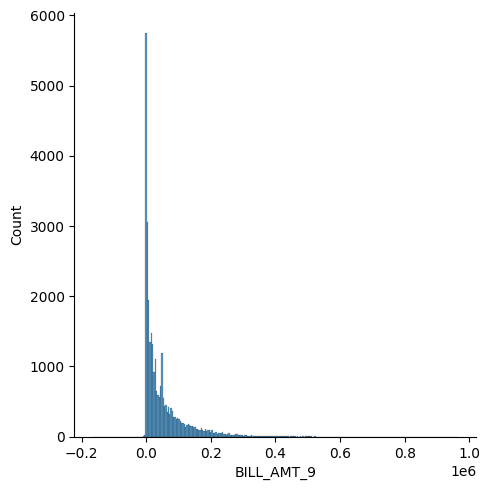

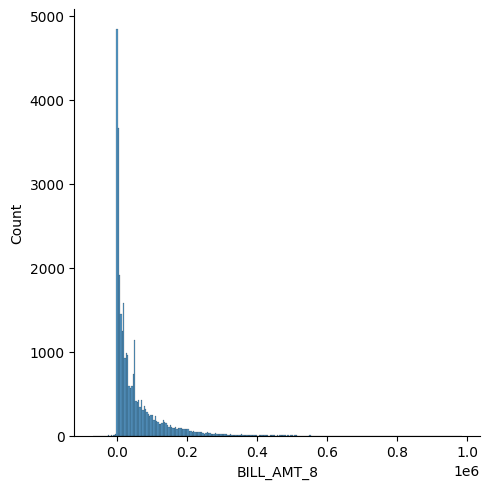

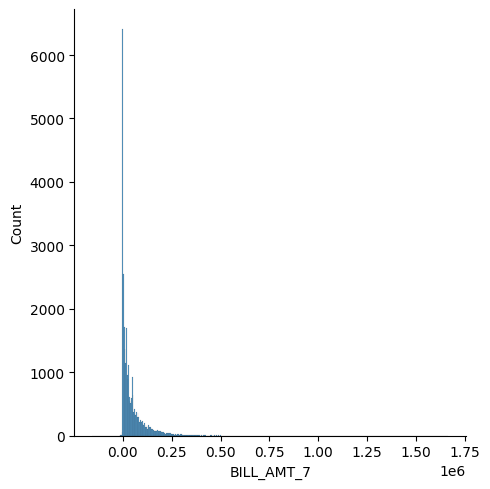

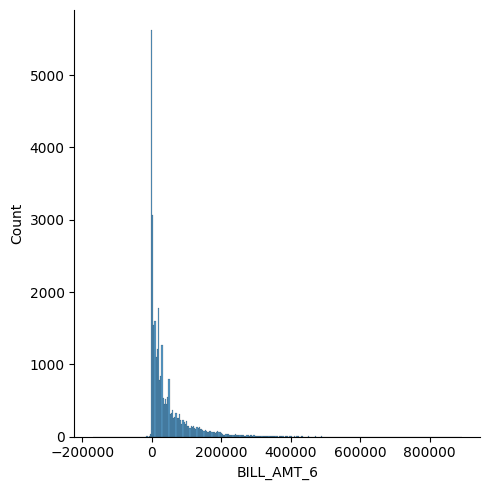

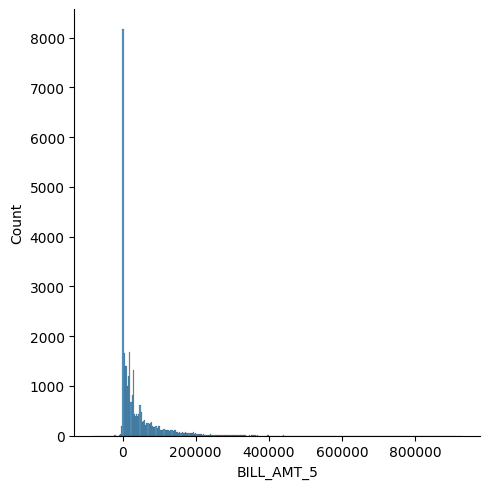

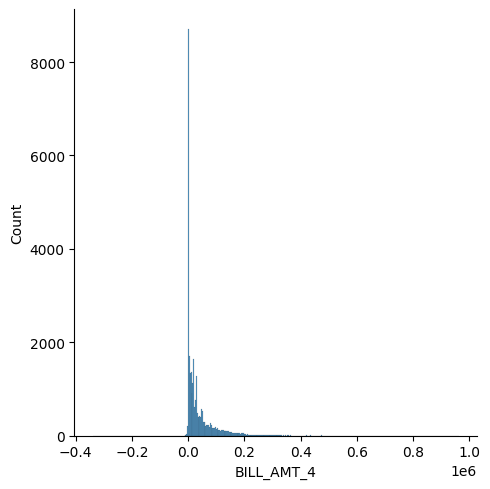

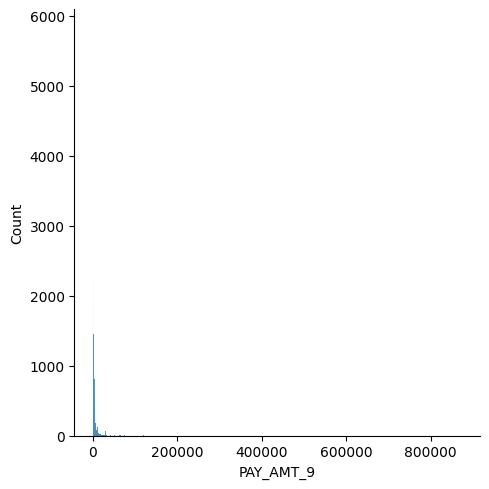

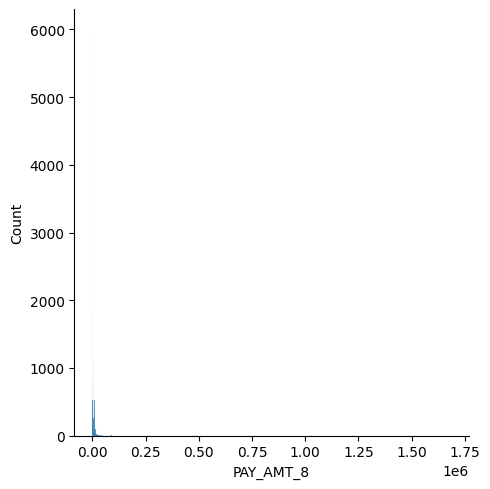

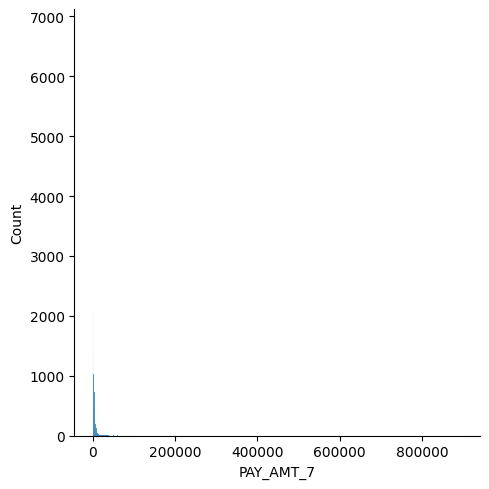

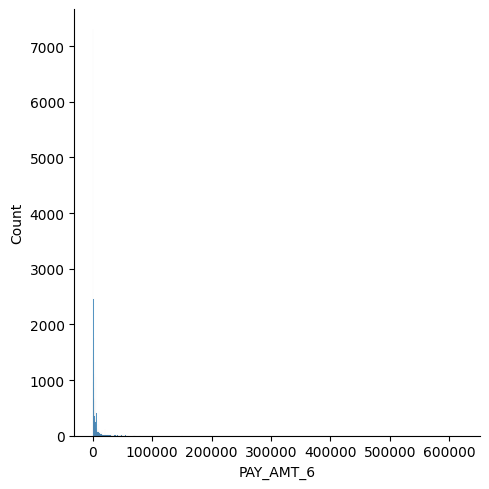

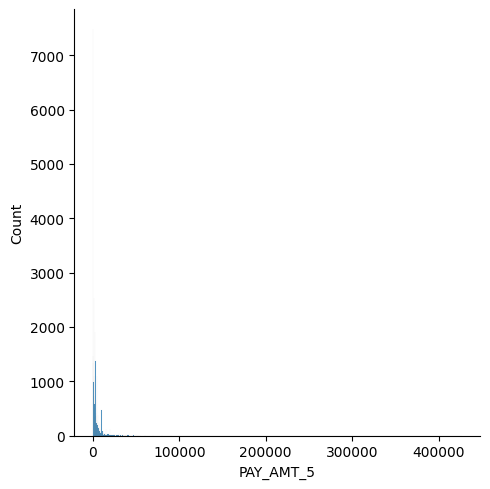

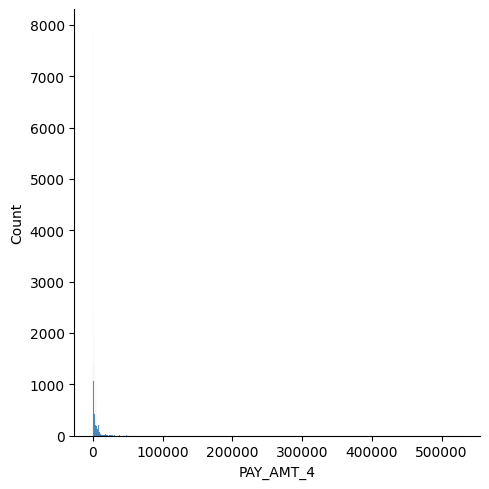

In [20]:
# Check singularly the features distribution
for column in numerical_columns:
  sns.displot(X[column])
  plt.show()

In [21]:
# Select the categorical features, except the ID
# PAY_N features were previously categorized as numericals but are actually encoded categorical features.
categorical_columns = [columns[2]] + columns[4:10] + columns[22:]
categorical_columns

['SEX_MALE',
 'PAY_9',
 'PAY_8',
 'PAY_7',
 'PAY_6',
 'PAY_5',
 'PAY_4',
 'EDUCATION_0',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'EDUCATION_5',
 'EDUCATION_6',
 'MARRIAGE_0',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3']

In [22]:
# Check the presence of outliers
len(X_numerics[(np.abs(stats.zscore(X_numerics)) > 2).all(axis = 1)])
# We used 2 sigmas which is quite strict, but still we don't have outliers.

0

No outliers were found in the dataset, also before scaling the data. 
We'll now scale the data.

We decide to have 2 different datasets, one scaled with MinMaxScaler and one transformed using the log function.

In [23]:
# We have many features that are Poisson distributed, so it could make sense to apply a natural logarithm transformation to them.
X_log = X.copy()
big_number = 500_000  # Big number was used to avoid negative values in the natural log. we'll later substract by log(big_number).
for column in payment_columns:
    X_log[column] = np.log(X[column] + big_number + 1)  # Add 1 to avoid zeroes in the natural log function
    X_log[column] = X_log[column] - np.log(big_number)  

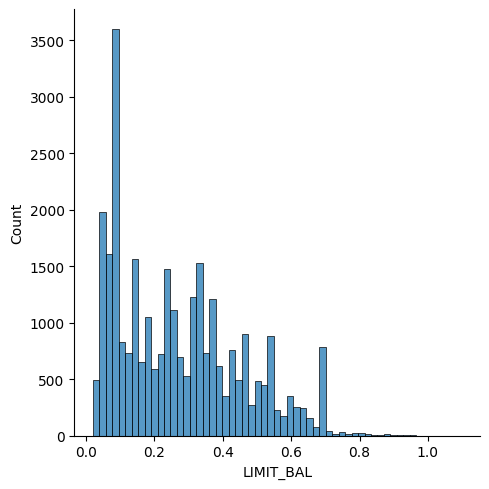

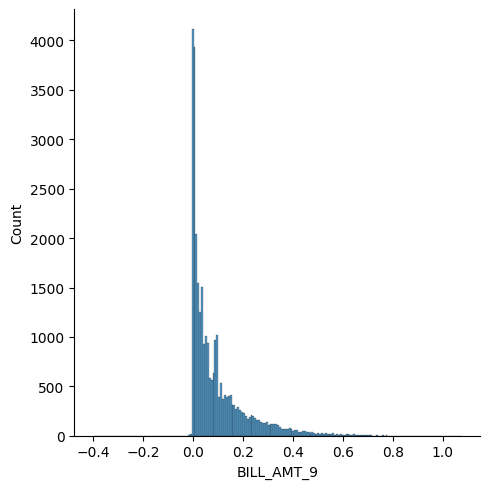

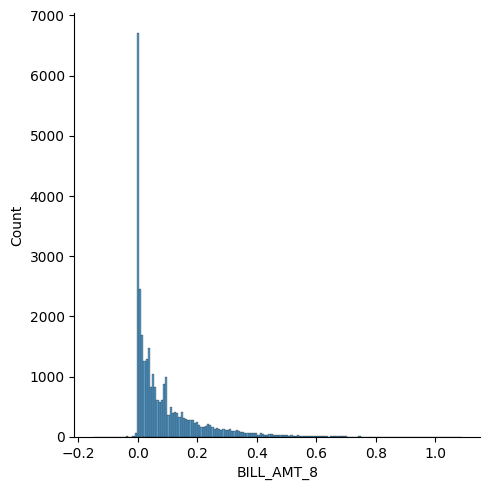

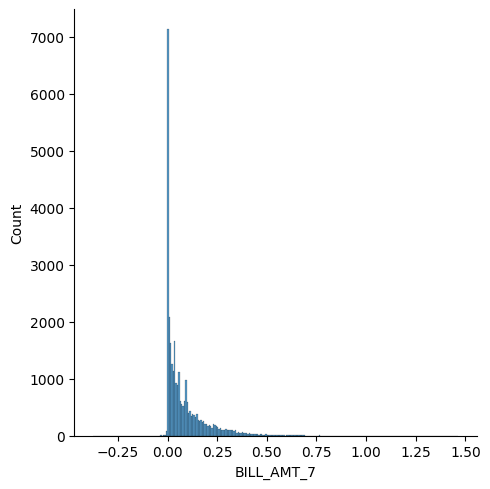

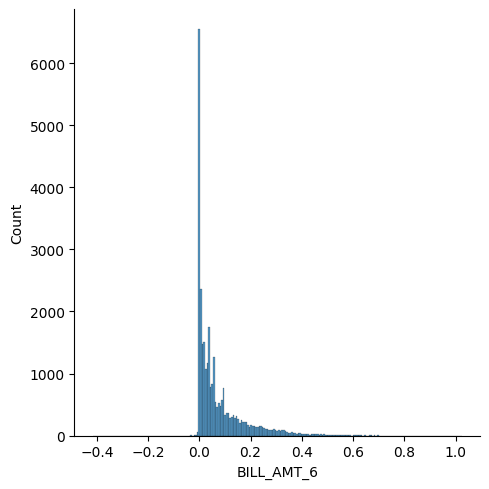

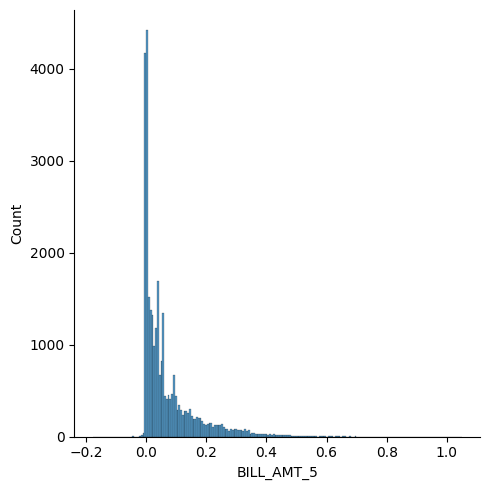

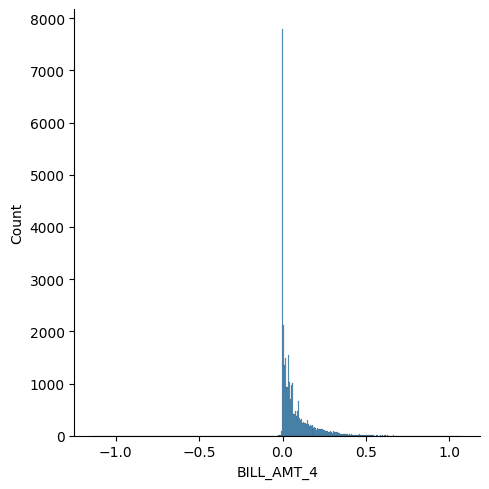

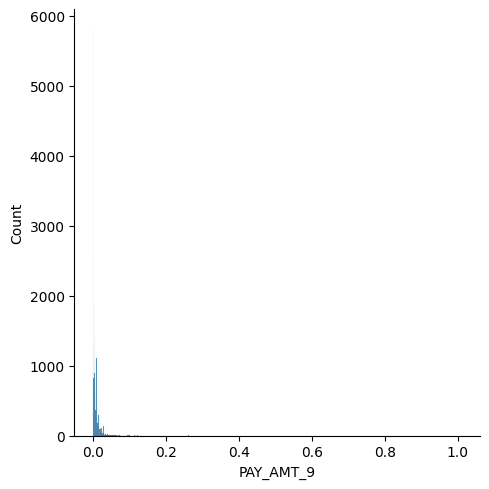

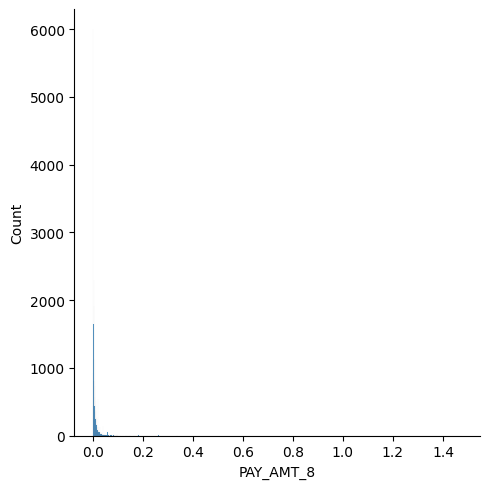

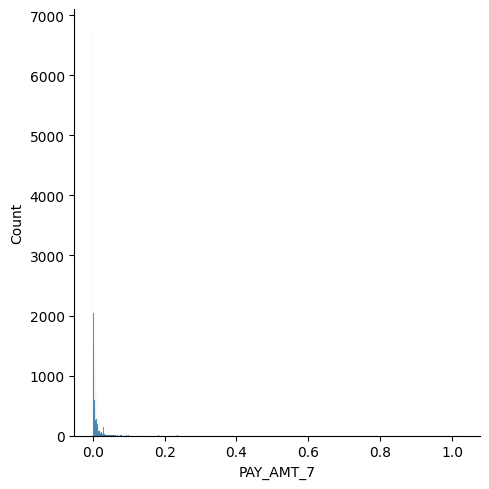

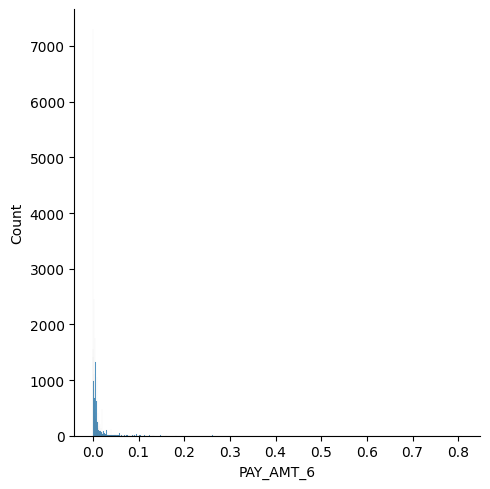

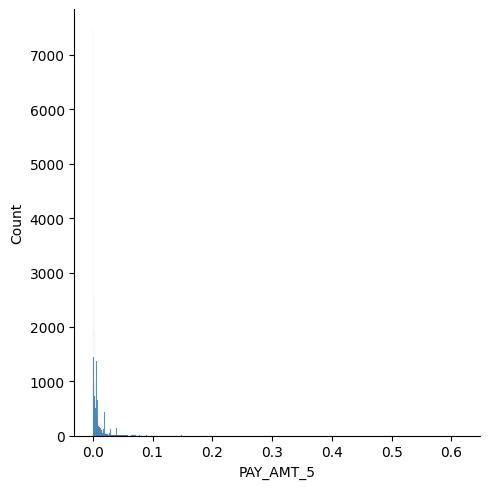

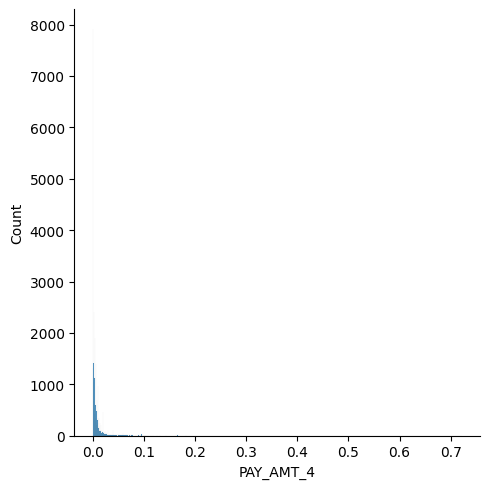

In [24]:
# Check singularly the numerical features distribution after natural logarithm transformation
for column in payment_columns:
  sns.displot(X_log[column])
  plt.show()

In [25]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# Split the data transformed with the log function into training and testing sets
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log, y, random_state=42)

We used the same random state for the two datasets train_test_split as in this way we can save and use just two files having in one the y_train data and in the other the y_test data. 

In [27]:
# Scale the numerical features
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[payment_columns] = scaler.fit_transform(X_train[payment_columns])
X_test_scaled[payment_columns] = scaler.transform(X_test[payment_columns])

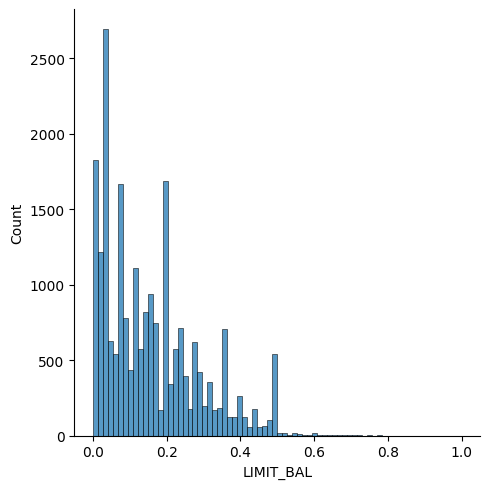

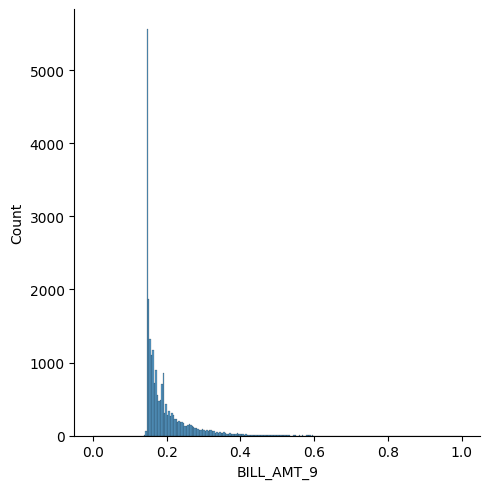

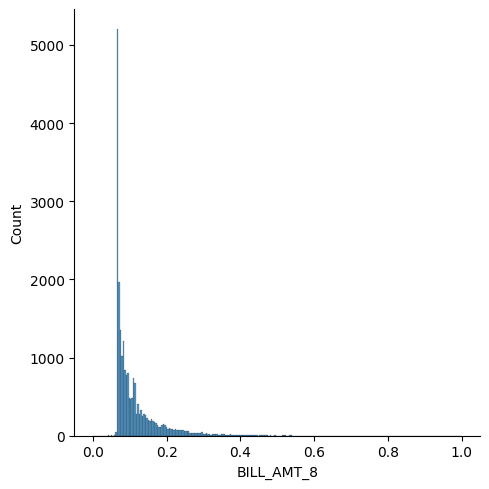

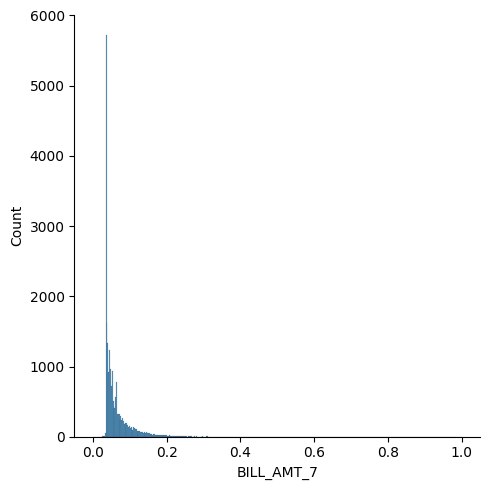

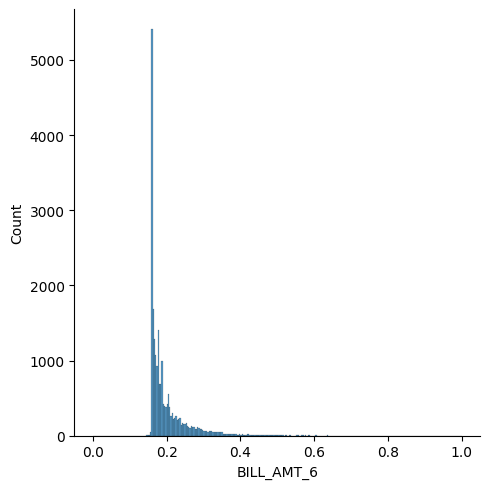

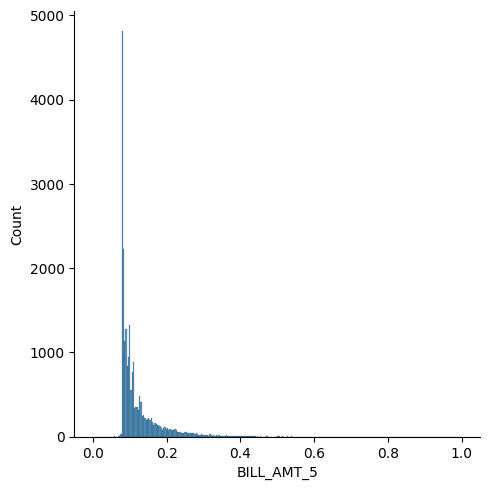

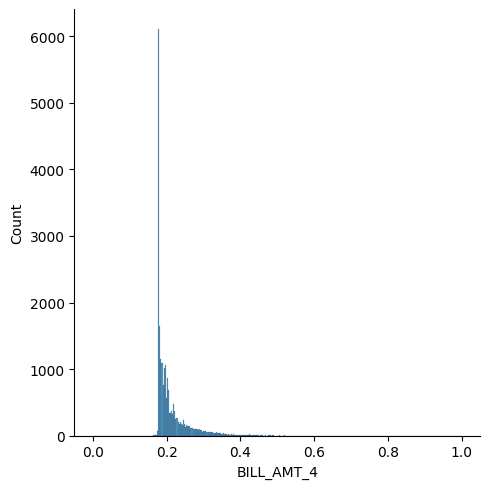

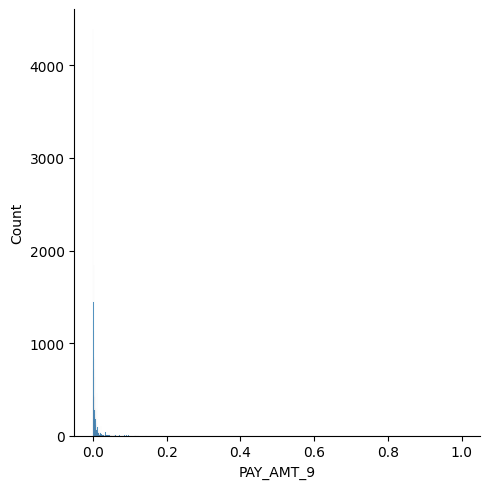

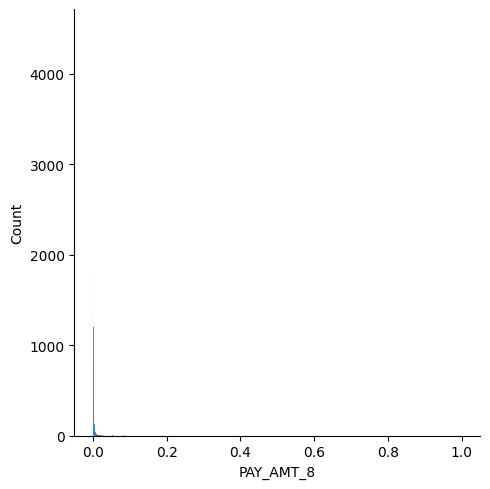

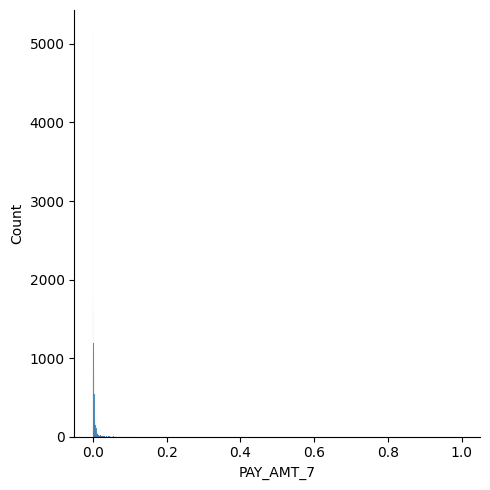

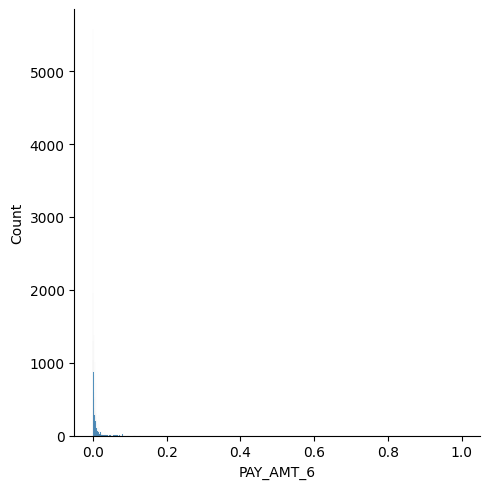

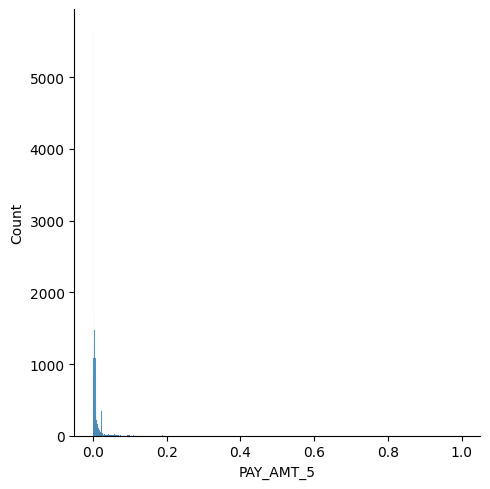

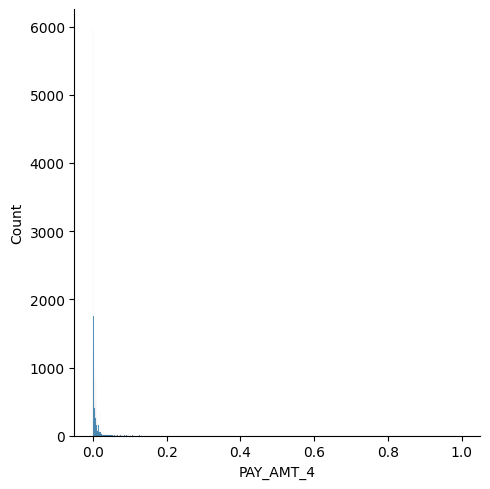

In [28]:
# Check singularly the scaled numerical features distribution
for column in payment_columns:
  sns.displot(X_train_scaled[column])
  plt.show()

In [29]:
# Check the target feature distribution
y_dis = y.value_counts()
print(y_dis)
print('ratio of 1s: ', y_dis[1]/y_dis[0])

0    23364
1     6636
Name: default payment next month, dtype: int64
ratio of 1s:  0.2840267077555213


In [30]:
# Check the target feature distribution on training and testing sets
y_dis_train = y_train.value_counts()
y_dis_test = y_test.value_counts()
print(y_dis_train)
print('ratio of 1s in training: ', y_dis_train[1]/y_dis_train[0])
print(y_dis_test)
print('ratio of 1s in testing: ', y_dis_test[1]/y_dis_test[0])

0    17491
1     5009
Name: default payment next month, dtype: int64
ratio of 1s in training:  0.2863758504373678
0    5873
1    1627
Name: default payment next month, dtype: int64
ratio of 1s in testing:  0.27703047846075257


In [31]:
# Drop the ID feature
X_train = X_train.drop(['ID'], axis=1)
X_test = X_test.drop(['ID'], axis=1)
X_train_scaled = X_train_scaled.drop(['ID'], axis=1)
X_test_scaled = X_test_scaled.drop(['ID'], axis=1)
X_train_log = X_train_log.drop(['ID'], axis=1)
X_test_log = X_test_log.drop(['ID'], axis=1)

The target is very unbalanced. We'll take it into account.

Save the two datasets into pickle files and move to Feature Generation and Selection

In [32]:
# Save the two datasets in pickle files
X_train.to_pickle(dir_path + "\\data\\X_train.pkl")
X_test.to_pickle(dir_path + "\\data\\X_test.pkl") 

X_train_scaled.to_pickle(dir_path + "\\data\\X_train_norm.pkl")
X_test_scaled.to_pickle(dir_path + "\\data\\X_test_norm.pkl")

X_train_log.to_pickle(dir_path + "\\data\\X_train_log.pkl")
X_test_log.to_pickle(dir_path + "\\data\\X_test_log.pkl")

y_train.to_pickle(dir_path + "\\data\\y_train.pkl")
y_test.to_pickle(dir_path + "\\data\\y_test.pkl")